# Decision Trees
<li>Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression.</li>
<li>It is a non-parametric learning algorithm because it doesnot make any assumptions about the underlying data distribution or parameters.</li>
<li>The goal of decision trees is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.</li>
<li>Decision Tree has a hierarchical, tree like structure, which consists of a root node, branches, internal nodes and leaf nodes.</li>

![](images/decision_trees.png)

## How Decision Trees Work?
<li>The decision tree algorithm builds the tree in a recursive way, by selecting the best attribute to split the data at each node based on some criterion.</li>
<li>The criterion that can be used for splitting up a decision node is information gain or Gini impurity.</li>
<li>Information gain measures the reduction in entropy (i.e., uncertainty) of the class labels after a split.</li>
<li>Entropy is defined as a measure of randomness or disorder of a system.</li>
<li>Information gain and Entropy are inversely proportional to each other.</li>
<li>When entropy increases, information gain decreases and when entropy decreases, information gain increases.</li>
<li>Gini impurity measures the probability of misclassifying a random sample from the node.</li>
<li>The process continues until all the instances in a node belong to the same class or until a stopping criterion is met.</li>
<li>Stopping criterion could be maximum tree depth or minimum number of instances per leaf.</li>
<li>The resulting tree can be used to classify new instances by traversing from the root to a leaf node, following the path that satisfies the tests at each node.</li>

![](images/working_of_dtrees.png)

## Decision Tree Inducers (Types Of Decision Tree Algorithm)
<li>A decision tree inducer is an algorithm that is used to build a decision tree from a given dataset. Here are some commonly used decision tree inducers:</li>
<ol>
    <b><li>ID3</li></b>
    <b><li>C4.5</li></b>
    <b><li>CART</li></b>
</ol>

<b>1. ID3:</b>
<li>The full form of ID3 algorithm is Iterative Dichotomiser 3.</li>
<li>This is one of the earliest decision tree algorithms developed by Ross Quinlan.</li> 
<li>It uses the concept of entropy and information gain to select the best attribute for splitting the data at each node.</li>
<li>It cannot handle numeric featues and it can only be used for classification tasks only.</li>

<b>2. C4.5:</b>
<li>C4.5 is actually an abbreviation for "Classifier Version 4.5".</li>
<li>It is a decision tree algorithm that was developed by Ross Quinlan, and it is an extension of the earlier ID3 algorithm.</li>
<li>The C4.5 algorithm can handle both discrete and continuous data.</li>
<li>It uses <b>information gain ratio</b> as the splitting criterion.</li>
<li>It also includes a post-pruning step to reduce overfitting.</li>

<b>3. CART:</b>
<li>The full form of CART is Classification And Regression Trees.</li>
<li>This is a decision tree algorithm developed by Breiman, Friedman, Olshen, and Stone.</li>
<li>It can be used for both classification and regression tasks.</li>
<li>It uses the GIni impurity measure to select the best attribute for splitting the data.</li>

![](images/decision_tree_inducers.png)

## Entropy

<li>We use the concept of Entropy and Information Gain while splitting up a node in an ID3 algorithm.</li>
<li>Entropy is defined as a measure of randomness or disorder in the system.</li>
<li>The formula to calculate entropy is given by:</li>

![](images/Entropy_formula.png)

<li>Here, c is the number of class. So for binary classification problem, the entropy formula is given by:</li>

![](images/expanded_eqn_entropy.png)

<li>Here, p is the probablity that it belongs to positive class and q is the probability that it belongs to negative class.</li>
<li>Let's say you are predicting whether the employee will get a promotion or not.</li>
<li>If only 30% of employees in your total dataset has received promotion then your p=0.3 being your positive class and q=1-p=0.7 being your negative class.</li>

## Information Gain & Splitting Of Node In ID3 Algorithm
<li>One of the key steps in ID3 algorithm is to split a node into child nodes based on the attribute that maximizes the information gain.</li>

<li>Information gain is a measure of the reduction in entropy (impurity) of the dataset after splitting the data based on an attribute.</li>
<li>Entropy is a measure of the randomness or uncertainty in the dataset.</li>

**The formula for information gain is:**
<code>
Information Gain = Entropy(parent) - ∑ [Weighted Average] * Entropy(children)
</code>
**where**

<li>Entropy(parent) is the entropy of the parent node</li>
<li>Entropy(children) is the entropy of each child node</li>
<li>the Weighted Average is the proportion of the data that belongs to each child node.</li>


![](images/information_gain_id3.png)
<li>Firstly, we calculate the entropy of the parent node
<li>After calculating entropy, we calculate the information gain for each of the attributes.</li>
<li>The attribute that results in the highest information gain is selected as the splitting attribute for the node.</li> 
<li>The node is then split into child nodes based on the values of the selected attribute.</li>
<li>This process is repeated recursively until all leaf nodes are pure (contain only one class) or until some stopping criteria is met.</li>
<li>In this way, ID3 algorithm uses information gain to select the attribute to split a node and to construct a decision tree from the dataset.</li>



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
gameplay_df = pd.DataFrame({
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain",
               "Rain", "Overcast", "Sunny", "Sunny", "Rain",
               "Sunny", "Overcast", "Overcast", "Rain", 
               "Sunny", "Overcast", "Rain"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool",
                   "Cool", "Cool", "Mild", "Cool", "Mild",
                   "Mild", "Mild", "Hot", "Mild",
                   "Hot", "Mild", "Cool"],
    "Humidity": ["High", "High", "High", "High", "Normal",
                "Normal", "Normal", "High", "Normal", "Normal",
                "Normal", "High", "Normal", "High",
                "Normal", "High", "Normal"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Weak",
            "Strong", "Strong", "Weak", "Weak", "Weak",
            "Strong", "Strong", "Weak", "Strong", 
            "Strong", "Weak", "Strong"],
    "Play" : ["No", "No", "Yes", "Yes", "Yes",
             "No", "Yes", "No", "Yes", "Yes",
             "Yes", "Yes", "Yes", "No",
             "Yes", "Yes", "No"]
})

In [3]:
gameplay_df

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


### Gini Index 
<li>Gini index is a measure of impurity or diversity used to select the best split in decision trees.</li>
<li>In the context of decision trees, it is used to measure the quality of a split when determining the feature that should be used to create child nodes.</li>
<li>The main goal of measuring impurity is to create child nodes that are as pure as possible in terms of the target variable.</li>
<li>The Gini index measures the probability of misclassifying a randomly chosen element from a dataset.</li>
<li>It ranges from 0 to 1, where 0 indicates a pure node and 1 indicates maximum impurity.</li>
<li>A pure node is a node where all elements belong to the same class.</li>
<li>An impure node is a node where elements are equally distributed across all classes.</li>

**The formula for calculating the Gini index for a leaf node is:**
<code>
Gini Index(Leaf) = 1 - ∑(p_i^2)
</code>

**where p_i is the proportion of samples that belong to class i in the node.**

<li>After calculating the gini index for a leaf node, weighted gini index for the node is calculated based on the formula.</li>

![](images/weighted_gini_index.png)

<li>When selecting a split in a decision tree, the feature that results in the lowest weighted Gini index (highest purity) is chosen.</li>
<li>The resulting split divides the dataset into two or more child nodes, which are then processed recursively to create the decision tree.</li>



In [38]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import f_oneway
import plotly.graph_objects as go
from statsmodels.graphics.gofplots import qqplot

warnings.filterwarnings('ignore')

In [8]:
water_quality_df = pd.read_csv('csv_data/water_potability.csv')
print(water_quality_df.shape)


(3276, 10)


In [9]:
water_quality_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Visualizing null values in the column

<AxesSubplot: >

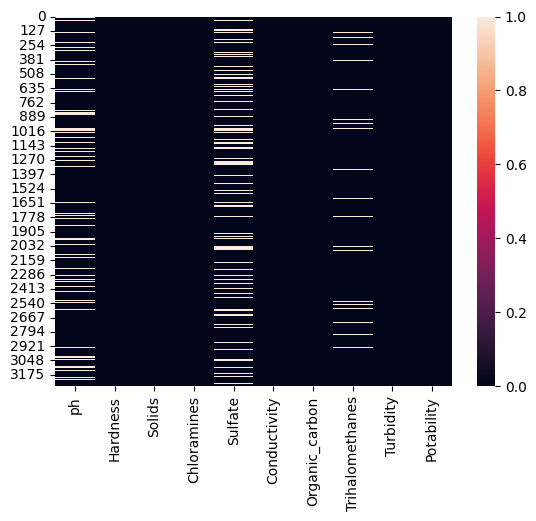

In [11]:
sns.heatmap(water_quality_df.isnull())

In [14]:
def univariate_count(df, col, final_cols):
    
    df = df[col].value_counts().reset_index()
    df.columns = final_cols
    return df


In [15]:
def create_piechart(df, val_col, label_col, colors, title, explode):
    
    plt.figure(figsize = (8,6))
    plt.pie(df[val_col], labels = df[label_col], explode = explode,
           colors = colors, autopct = "%.2f")
    plt.legend(loc = "upper right", bbox_to_anchor = (1.3, 1))
    plt.title(title)
    plt.show()



In [16]:
def univariate_barplot(df, val_col, label_col, colors, title,
                       xlabel_title, ylabel_title):
    
    plt.figure(figsize = (8, 6))
    ax = sns.barplot(x = label_col, y = val_col, data = df, 
                     palette = colors, label = df[label_col])
    plt.legend()
    for value in ax.patches:
        ax.text(value.get_x(), value.get_height() + 5, value.get_height())
    plt.title(title)
    plt.xlabel(xlabel_title)
    plt.ylabel(ylabel_title)
    plt.show()
    



In [40]:
def univariate_numeric_plot(df, col_name, color):
    
    plt.figure(figsize = (20, 8))
    plt.subplot(1,3,1)
    sns.histplot(df[col_name], kde = True,
                 color = color,
                 alpha = 0.2,
                line_kws = {'linestyle': 'dashed'})
    plt.subplot(1,3,2)
    sns.kdeplot(df[col_name])
    plt.subplot(1,3,3)
    sns.boxplot(y = df[col_name])
    if shapiro(df[col_name])[1] > 0.05:
        print("The data follows a normal distribution")
    else:
        print("The data does not follow a normal distribution")
    plt.show()
    
    


In [18]:
def bivariate_count(df, target_col, cause_col):
    
    bivariate_df = pd.crosstab(df[target_col], df[cause_col]).reset_index()
    bivariate_df = bivariate_df.rename_axis(None, axis = 1)
    return bivariate_df


In [19]:
def bivariate_vertical_layout(df, target_col, legend_x, legend_y, bar_width, bar_height):
    
    layout = go.Layout(
      legend=dict(
          x=legend_x,  
          y=legend_y),
      showlegend=True,
      font=dict(size=14),
      width=bar_width,
      height=bar_height,
      margin=dict(l=0, r=0, b=0, t=30),
    )
    return layout




In [20]:
def bivariate_horizontal_layout(df, target_col, legend_x, legend_y, bar_width, bar_height):
    
    layout = go.Layout(
      legend=dict(
          x=legend_x,  
          y=legend_y),
      showlegend=True,
      font=dict(size=14),
      width=bar_width,
      height=bar_height,
      margin=dict(l=0, r=0, b=0, t=30),
    )
    return layout



In [21]:
def create_bivariate_bargraph(df, colors, legend_labels,
                              target_col, graph_orientation, bar_width, bar_height,
                              legend_x, legend_y, fig_title, 
                              x_axis_title, y_axis_title):
    
    barplots = []
    columns = [col for col in list(df.columns) if col not in target_col]
    target_values = df[target_col]
    target_indexes = list(range(len(df)))
    if graph_orientation == "v":
        for i in range(len(columns)):
            barplots.append(go.Bar(x = target_values[target_indexes], 
            y = df[columns[i]], orientation = graph_orientation,
            name=legend_labels[i],
            text = df[columns[i]], 
            marker=go.bar.Marker(color=colors[i])))
        layout = bivariate_vertical_layout(df, target_col, legend_x, legend_y, bar_width, bar_height)    
    else:
        for i in range(len(columns)):
            barplots.append(go.Bar(x = df[columns[i]], 
            y = target_values[target_indexes], orientation = graph_orientation,
            name=legend_labels[i],
            text = df[columns[i]], 
            marker=go.bar.Marker(color=colors[i])))
    layout = bivariate_horizontal_layout(df, target_col, legend_x, legend_y, bar_width, bar_height)
    
# Make the multi-bar plot
    fig = go.Figure(data=barplots, layout=layout)
    fig.update_layout(title_text = fig_title)
    fig.update_xaxes(title_text=x_axis_title)
    fig.update_yaxes(title_text=y_axis_title)
    fig.show()



In [22]:
def bivariate_kdeplot(df, col_name, target_col, colors):
    
    target_values = list(df[target_col].unique())
    legends = []
    for index in range(len(target_values)):
        if type(target_values[index]).__name__ == 'float':
            legends.append('test')
            effect_col = df.loc[df[target_col].isnull()]
            sns.kdeplot(effect_col[col_name],
             color = colors[index])
        else: 
            legends.append(target_values[index])
            effect_df = df.loc[df[target_col] == target_values[index]]
            sns.kdeplot(effect_df[col_name],
                         color = colors[index])
    plt.legend(legends)
    
    


In [23]:
def bivariate_histplot(df, col_name, target_col, colors):
    
    target_values = list(df[target_col].unique())
    legends = []
    for index in range(len(target_values)):
        if type(target_values[index]).__name__ == 'float':
            legends.append('test')
            effect_col = df.loc[df[target_col].isnull()]
            sns.histplot(effect_col[col_name], kde = True,
             color = colors[index],
             alpha = 0.2,
            line_kws = {'linestyle': 'dashed'})
        else: 
            legends.append(target_values[index])
            effect_df = df.loc[df[target_col] == target_values[index]]
            sns.histplot(effect_df[col_name], kde = True,
                         color = colors[index],
                         alpha = 0.2,
                        line_kws = {'linestyle': 'dashed'})
    plt.legend(legends)
    

In [24]:
def bivariate_hist_kdeplot(df, col_name, target_col, colors):
    
    plt.figure(figsize = (16, 8))
    plt.subplot(1, 2, 1)
    bivariate_histplot(df, col_name, target_col, colors)
    plt.subplot(1,2, 2)
    bivariate_kdeplot(eda_df, col_name, target_col, colors)
    plt.show()

In [25]:
def chisquare_test(df, cause_col, effect_col):
    
    cause_effect_df = pd.crosstab(df[effect_col], df[cause_col])
    alpha = 0.05
    H0 = "H0: There is no relationship between {} and {}".format(cause_col, effect_col)
    H1 = "H1: There is a relationship between {} and {}".format(cause_col, effect_col)
    test_stats = stats.chi2_contingency(observed = cause_effect_df)
    p_value = test_stats[1]
    print("P value is {}".format(p_value))
    if p_value <= alpha:
        print(H1)
    else:
        print(H0)



In [35]:
def fstatistic_test(df, cause_col, effect_col):
    
    alpha = 0.05
    category_group_list = df.groupby(effect_col)[cause_col].apply(list)
    H0 = "H0: There is no relationship or correlation between {} and {}".format(cause_col, effect_col)
    H1 = "H1: There is a relationship or correlation between {} and {}".format(cause_col, effect_col)
    anova_results = f_oneway(*category_group_list)
    p_value = anova_results[1]
    print("P value is {}".format(p_value))
    if p_value <= alpha:
        print(H1)
    else:
        print(H0)
        

### Target Data Visualization

In [29]:
eda_water_df = water_quality_df.copy()

In [32]:
eda_water_df.replace({"Potability": {0: "Non potable",
                                     1: "Potable"}},
                     inplace = True)

In [33]:
target_df = univariate_count(df = eda_water_df,
                             col= "Potability",
                             final_cols=["Potability", "Frequency"])
target_df.head()

,Potability,Frequency
0,Non potable,1998
1,Potable,1278


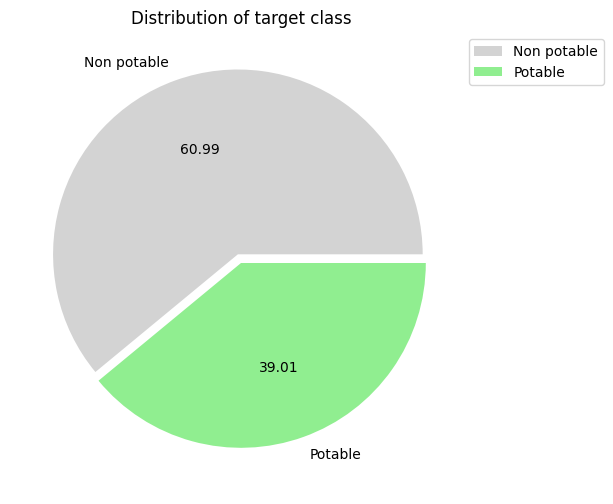

In [34]:
create_piechart(df=target_df,
                val_col="Frequency",
                label_col="Potability",
                colors = ["lightgray", "lightgreen"],
                title="Distribution of target class",
                explode = (0.05, 0))

## ph value

The data follows a normal distribution


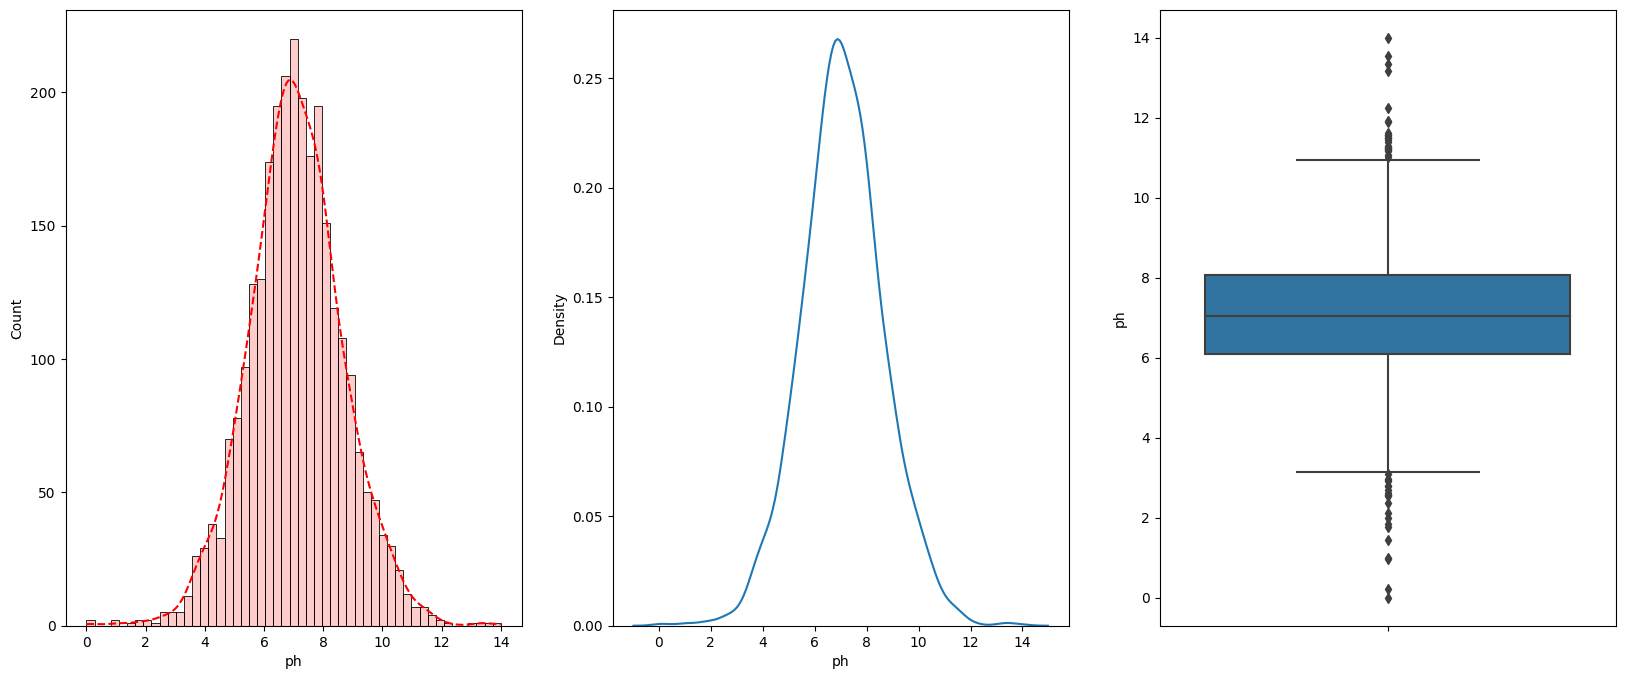

In [41]:
# water_quality_df
univariate_numeric_plot(df=eda_water_df,
                        col_name='ph', color='red')

### Hardness

The data does not follow a normal distribution


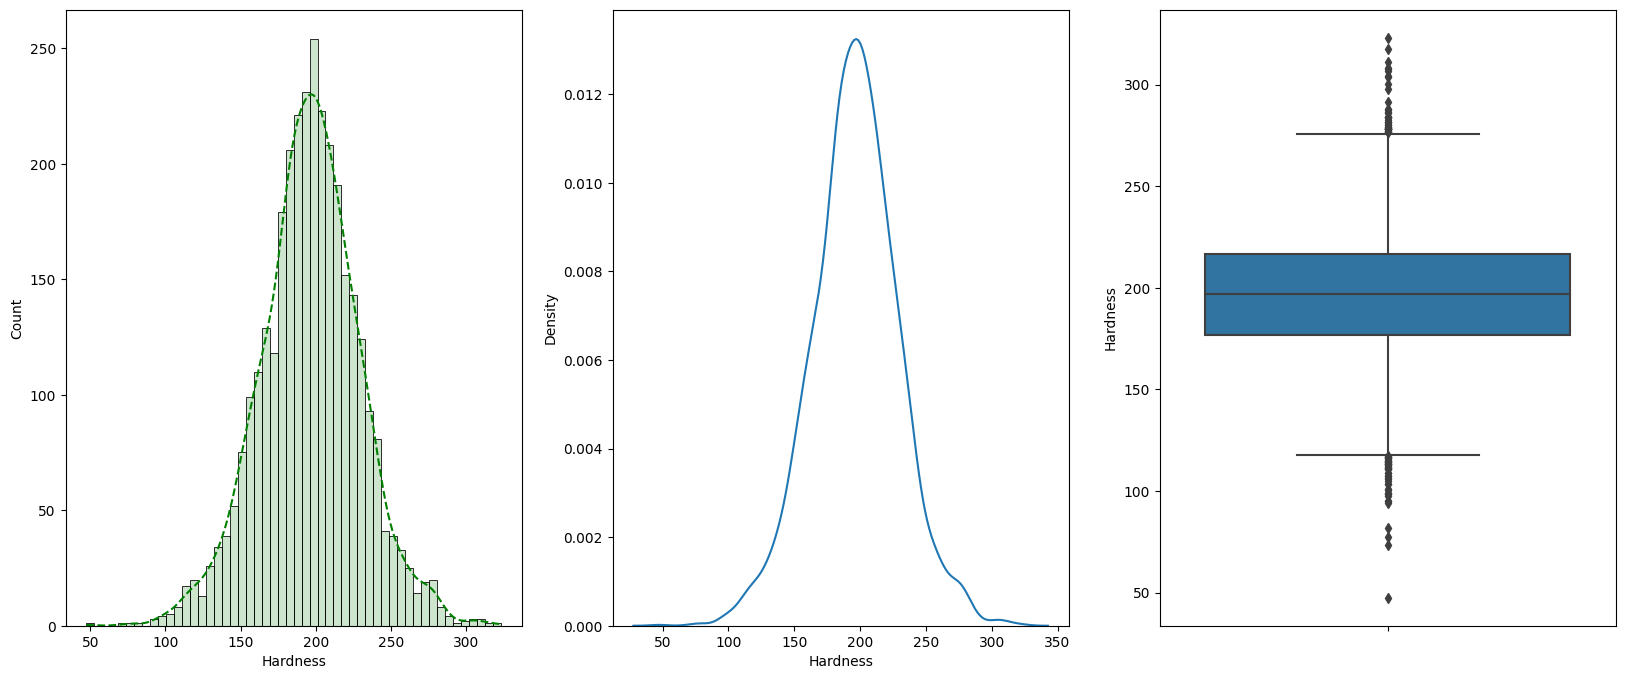

In [44]:
# water_quality_df
univariate_numeric_plot(df=eda_water_df,
                        col_name='Hardness', color='green')

### Is the potability of water impacted by ph value of water?

In [47]:
eda_water_df
fstatistic_test(df = eda_water_df.dropna(), 
                cause_col = "ph",
                effect_col="Potability")

P value is 0.5149065707818103
H0: There is no relationship or correlation between ph and Potability


### Is the potability of water impacted by hardness of water?

In [48]:
eda_water_df
fstatistic_test(df = eda_water_df.dropna(), 
                cause_col = "Hardness",
                effect_col="Potability")

P value is 0.9462238843630211
H0: There is no relationship or correlation between Hardness and Potability


In [54]:
fstatistic_test(df = eda_water_df.dropna(), 
                cause_col = "Chloramines",
                effect_col="Potability")

P value is 0.3515717996483123
H0: There is no relationship or correlation between Chloramines and Potability


In [55]:
fstatistic_test(df = eda_water_df.dropna(), 
                cause_col = "Sulfate",
                effect_col="Potability")

P value is 0.4927947335655132
H0: There is no relationship or correlation between Sulfate and Potability


In [57]:
fstatistic_test(df = eda_water_df.dropna(), 
                cause_col = "Conductivity",
                effect_col="Potability")

P value is 0.48736711195012816
H0: There is no relationship or correlation between Conductivity and Potability


In [58]:
fstatistic_test(df = eda_water_df.dropna(), 
                cause_col = "Trihalomethanes",
                effect_col="Potability")

P value is 0.6786576528829604
H0: There is no relationship or correlation between Trihalomethanes and Potability


In [59]:
fstatistic_test(df = eda_water_df.dropna(), 
                cause_col = "Turbidity",
                effect_col="Potability")

P value is 0.30930963202383144
H0: There is no relationship or correlation between Turbidity and Potability


#### Modelling

### FIlling in missing values with mean for ph column

In [63]:
water_quality_df.loc[water_quality_df['ph'].isnull(), 'ph'] = \
water_quality_df['ph'].mean()

### Filling in missing values with mean for Sulphate column

In [65]:
water_quality_df.loc[water_quality_df['Sulfate'].isnull(), 'Sulfate'] = \
water_quality_df['Sulfate'].mean()

### Filling in missing values with mean for Trihalomethanes column

In [67]:
water_quality_df.loc[water_quality_df['Trihalomethanes'].isnull(),
                     'Trihalomethanes'] = \
water_quality_df['Trihalomethanes'].mean()

In [69]:
water_quality_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


### Data Preparation Step

In [74]:
data = water_quality_df.drop('Potability', axis = 1)
labels = water_quality_df['Potability']

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train, x_test, y_train, y_test = train_test_split(data, labels,
                                                    random_state = 42,
                                                   shuffle = True,
                                                   stratify = labels,
                                                   test_size = 0.25)

In [79]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2457, 9)
(819, 9)
(2457,)
(819,)


In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dt_clf = DecisionTreeClassifier()

In [82]:
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [83]:
y_pred = dt_clf.predict(x_test)

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [90]:
confusion_matrix(y_test, y_pred)

array([[317, 182],
       [168, 152]], dtype=int64)

In [87]:
accuracy_score(y_test, y_pred)

0.5726495726495726

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64       499
           1       0.46      0.47      0.46       320

    accuracy                           0.57       819
   macro avg       0.55      0.56      0.55       819
weighted avg       0.58      0.57      0.57       819



### Visualizing a decision Tree

In [92]:
from sklearn import tree

text_representation = tree.export_text(dt_clf)
print(text_representation)

|--- feature_4 <= 260.92
|   |--- feature_0 <= 5.31
|   |   |--- class: 0
|   |--- feature_0 >  5.31
|   |   |--- feature_2 <= 21161.41
|   |   |   |--- feature_0 <= 7.90
|   |   |   |   |--- feature_4 <= 224.86
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  224.86
|   |   |   |   |   |--- feature_8 <= 2.31
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_8 >  2.31
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  7.90
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  21161.41
|   |   |   |--- feature_8 <= 4.70
|   |   |   |   |--- feature_0 <= 11.53
|   |   |   |   |   |--- feature_5 <= 267.60
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  267.60
|   |   |   |   |   |   |--- feature_8 <= 3.25
|   |   |   |   |   |   |   |--- feature_8 <= 3.20
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_8 >  3.20
|   |   |   |   |   |   |   |   |--- class: 0
|   |  

In [98]:
features = list(water_quality_df.columns)[:-1]
target = list(water_quality_df.columns)[-1]



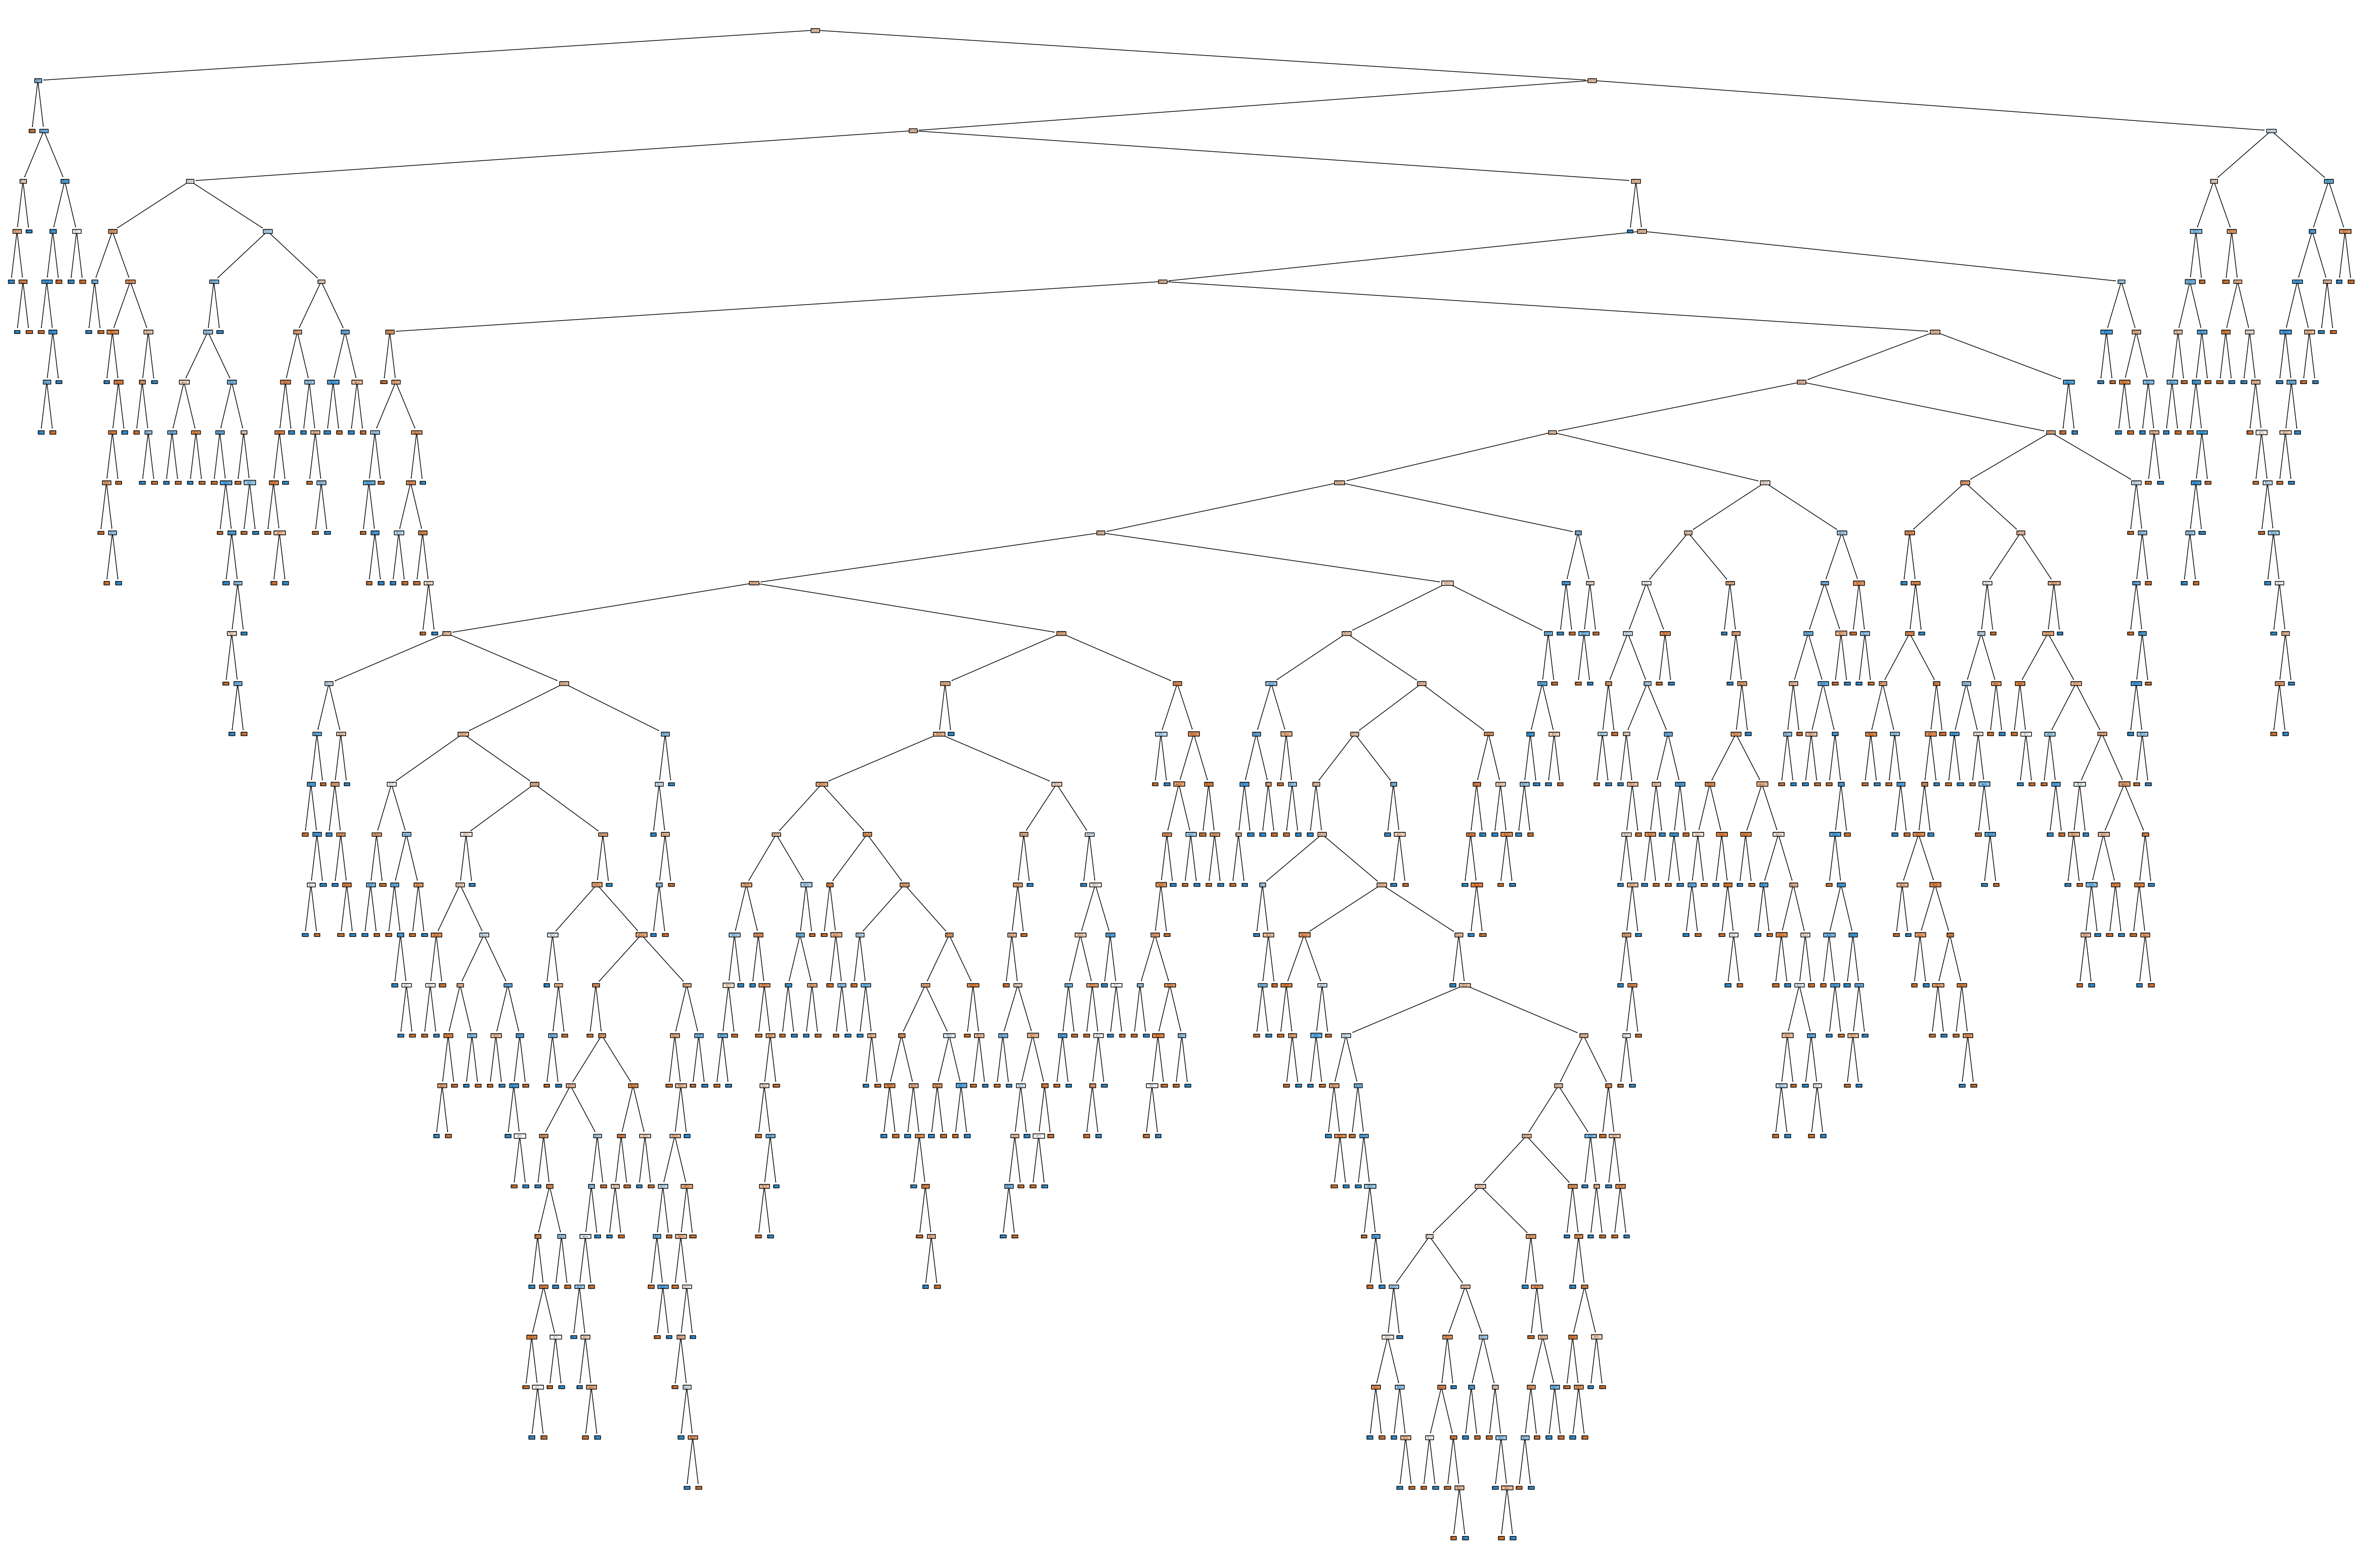

In [100]:
fig = plt.figure(figsize=(60,40))
_ = tree.plot_tree(dt_clf, 
                   feature_names=features,  
                   class_names=target,
                   filled=True)


### Iris Dataset

In [113]:
df = pd.read_csv('csv_data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [114]:
data = df.drop(['Id', 'Species'], axis= 1)
labels = df['Species']

In [115]:
x_train, x_test, y_train, y_test = train_test_split(data, labels,
                                                    random_state = 42,
                                                   test_size = 0.2, 
                                                   stratify = labels)

In [116]:
clf = DecisionTreeClassifier()

In [117]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [118]:
y_pred = clf.predict(x_test)

In [119]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [124]:
features = list(df.columns)[:-1]
target = np.unique(df['Species'])

In [126]:
target

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

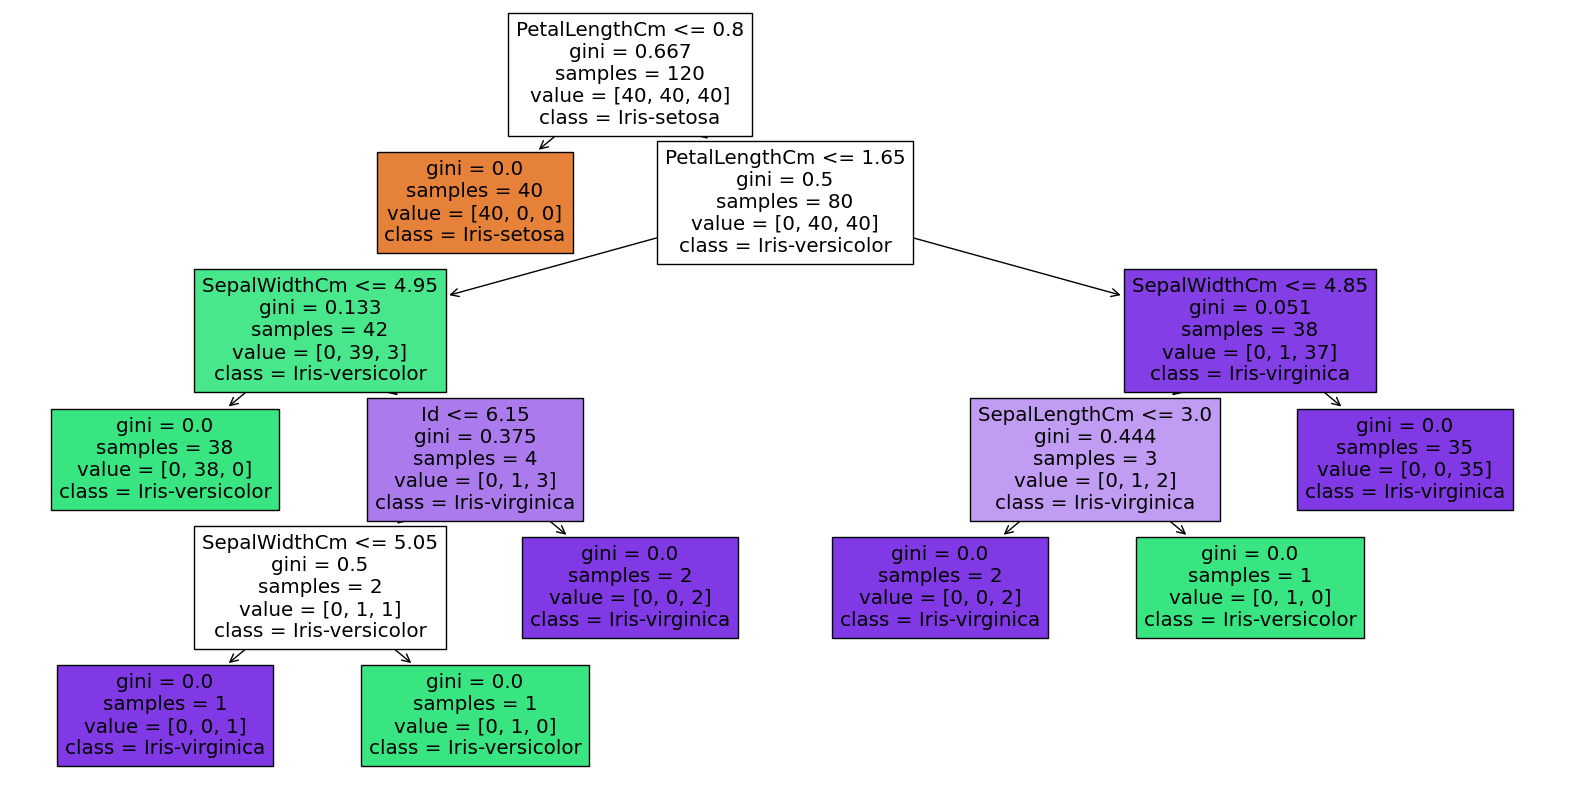

In [127]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(clf, 
                   feature_names=features,  
                   class_names=target,
                   filled=True)


### Decision Tree For Regression
<li>For classification, DT tries to split node by maximizing information gain incase of ID3 or minimizing gini index incase of CART.</li>
<li>But for regression, the goal is to reduce the variance of the target variable (i.e., the dependent variable).</li>
<li>Decision Trees works on the principle of variance reduction since the target variable is continuous.</li>
<li>This is typically done by minimizing the sum of squared differences between the target variable and the mean value of the samples in each resulting group.</li>

### How Splitting Of Node is Done in Decision Tree Regressor

<li>The decision tree regressor considers all possible splits for each predictor variable and selects the one that maximizes the variance reduction.</li>
<li>The process is repeated recursively for each resulting group until a stopping criterion is met.</li>
<li>Common stopping criteria include a minimum number of samples required to split a node, a maximum tree depth.</li>